### Предобработка текста

In [1]:
import pandas as pd
import re

In [60]:
!pip install adjustText -q

DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.12/site-packages/scikit_uplift-0.5.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [2]:
df = pd.read_csv("https://storage.yandexcloud.net/auth-def-2024/datasets/meta_table_with_texts.csv")
df = df[['author', 'text']]
df.head(5)

,author,text
0,Пушкин Александр Сергеевич,"\n \nЛитературный альбомъ.\n""Сраженный рыцар..."
1,Карамзин Николай Михайлович,\nО достоинстве древних и новых\n(Перевод с не...
2,Гоголь Николай Васильевич,\n Гоголь Н. В. Полное собрание сочинений и ...
3,Мамин-Сибиряк Дмитрий Наркисович,\n \nД. МАМИНЪ-СИБИРЯКЪПОЛНОЕ СОБРАНІЕ СОЧИН...
4,Мамин-Сибиряк Дмитрий Наркисович,\nДмитрий Мамин-Сибиряк\nНимфа\nI.\n Щегольс...


Загружаем лемматизированные тексты из заранее подготовленного файла, сформированного после экспериментов.

In [20]:
df_lemm = pd.read_csv('lemm_texts.csv')
df_lemm.head()

,author,lemm_text
0,Пушкин Александр Сергеевич,литературный альбомъ сразить рыцарь послднимъ ...
1,Карамзин Николай Михайлович,достоинство древний новый перевод немецкий нек...
2,Гоголь Николай Васильевич,полный собрание сочинение письмо так переписка...
3,Мамин-Сибиряк Дмитрий Наркисович,собрана сочиненйтомъ восьмой издан марксъ петр...
4,Мамин-Сибиряк Дмитрий Наркисович,нимфа щегольский волжский пароход вулкан дать ...


In [22]:
df['lemm_text'] = df_lemm['lemm_text']
df.head()

,author,text,lemm_text
0,Пушкин Александр Сергеевич,"\n \nЛитературный альбомъ.\n""Сраженный рыцар...",литературный альбомъ сразить рыцарь послднимъ ...
1,Карамзин Николай Михайлович,\nО достоинстве древних и новых\n(Перевод с не...,достоинство древний новый перевод немецкий нек...
2,Гоголь Николай Васильевич,\n Гоголь Н. В. Полное собрание сочинений и ...,полный собрание сочинение письмо так переписка...
3,Мамин-Сибиряк Дмитрий Наркисович,\n \nД. МАМИНЪ-СИБИРЯКЪПОЛНОЕ СОБРАНІЕ СОЧИН...,собрана сочиненйтомъ восьмой издан марксъ петр...
4,Мамин-Сибиряк Дмитрий Наркисович,\nДмитрий Мамин-Сибиряк\nНимфа\nI.\n Щегольс...,нимфа щегольский волжский пароход вулкан дать ...


In [24]:
# Удаление невалидной записи с английским текстом
df = df.drop(index=1918)
df = df.reset_index(drop=True)
len(df)

2564

In [26]:
# Токенизация текста
def words_list(x):
  # Подсчёт слов в тексте
  words = re.findall(r'\b\w+\b', x)
  return [w.lower() for w in words]

In [28]:
df['words'] = df['lemm_text'].apply(words_list)
df.head(5)

,author,text,lemm_text,words
0,Пушкин Александр Сергеевич,"\n \nЛитературный альбомъ.\n""Сраженный рыцар...",литературный альбомъ сразить рыцарь послднимъ ...,"[литературный, альбомъ, сразить, рыцарь, послд..."
1,Карамзин Николай Михайлович,\nО достоинстве древних и новых\n(Перевод с не...,достоинство древний новый перевод немецкий нек...,"[достоинство, древний, новый, перевод, немецки..."
2,Гоголь Николай Васильевич,\n Гоголь Н. В. Полное собрание сочинений и ...,полный собрание сочинение письмо так переписка...,"[полный, собрание, сочинение, письмо, так, пер..."
3,Мамин-Сибиряк Дмитрий Наркисович,\n \nД. МАМИНЪ-СИБИРЯКЪПОЛНОЕ СОБРАНІЕ СОЧИН...,собрана сочиненйтомъ восьмой издан марксъ петр...,"[собрана, сочиненйтомъ, восьмой, издан, марксъ..."
4,Мамин-Сибиряк Дмитрий Наркисович,\nДмитрий Мамин-Сибиряк\nНимфа\nI.\n Щегольс...,нимфа щегольский волжский пароход вулкан дать ...,"[нимфа, щегольский, волжский, пароход, вулкан,..."


Загрузим эвристики, которые были рассчитаны и отобраны на этапе проведения экспериментов и замера метрик качества моделей.

In [30]:
# Загрузка фрейма с эвристиками
df_heuristics = pd.read_csv('heuristics.csv')
df_heuristics.head(5)

,num_words,avg_sentence_length,avg_word_length
0,347,17.350000,5.002882
1,988,17.642857,5.452429
2,177463,13.357143,5.226318
3,8774,12.410184,5.284477
4,4221,12.234783,5.027008


### Формирование выборок

На этапе проведения экспериментов было принято решение использовать комбинированный подход в выборе признаков.

In [33]:
X_heuristics = df_heuristics.copy()
X_words = df['words'].copy()
y = df['author'].copy()

In [34]:
from sklearn.model_selection import train_test_split

# Обучающая и тренировочная выборки
X_heur_train, X_heur_test, X_words_train, X_words_test, y_train, y_test = train_test_split(X_heuristics, X_words, y, test_size=0.2, random_state=42)

### Формирование эмбеддингов

In [174]:
import numpy as np

# Функция для представления текста как среднего из векторов слов
def vectorize_text(text, model):
    vectors = [model.wv[word] for word in text if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)  # Если нет слов из текста, возвращаем нулевой вектор
    return np.mean(vectors, axis=0)

Будем рассматривать $\text{Word2Vec}$, $\text{FastText}$ и $\text{GloVe}$, а также использовать $\text{Skip Gram}$.

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd
from matplotlib.colors import ListedColormap
from adjustText import adjust_text
from sklearn.cluster import KMeans
import random
from matplotlib import colormaps

In [179]:
def visualize_word_embeddings(model, num_words=100):
    """
    Визуализирует эмбеддинги слов с помощью t-SNE
    
    Args:
        model: обученная модель
        num_words: количество наиболее частых слов для визуализации
    """
    words = list(model.wv.index_to_key[:num_words])
    word_vectors = np.array([model.wv[word] for word in words])
    
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
    reduced_vectors = tsne.fit_transform(word_vectors)
    
    df = pd.DataFrame({
        'word': words,
        'x': reduced_vectors[:, 0],
        'y': reduced_vectors[:, 1]
    })
    
    plt.figure(figsize=(12, 8))
    plt.scatter(df['x'], df['y'], alpha=0.7)
    
    texts = []
    for i, row in df.iterrows():
        texts.append(plt.text(row['x'], row['y'], row['word'], fontsize=9))
    
    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5))
    
    plt.title('t-SNE визуализация эмбеддингов слов')
    plt.grid(True)
    plt.show()

In [181]:
def analyze_word_clusters(model, num_words=500, n_clusters=10):
    """
    Анализирует кластеры слов с помощью KMeans
    
    Args:
        model: обученная модель
        num_words: количество наиболее частых слов для анализа
        n_clusters: количество кластеров
    """
    words = list(model.wv.index_to_key[:num_words])
    word_vectors = np.array([model.wv[word] for word in words])
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(word_vectors)
    
    df = pd.DataFrame({
        'word': words,
        'cluster': clusters
    })
    
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
    reduced_vectors = tsne.fit_transform(word_vectors)
    df['x'] = reduced_vectors[:, 0]
    df['y'] = reduced_vectors[:, 1]
    
    plt.figure(figsize=(12, 8))
    cmap = colormaps['tab10'].resampled(n_clusters)
    plt.scatter(df['x'], df['y'], c=df['cluster'], cmap=cmap, alpha=0.7)
    plt.colorbar(label='Кластер')
    
    texts = []
    for cluster_id in range(n_clusters):
        cluster_words = df[df['cluster'] == cluster_id]

        sample_size = min(5, len(cluster_words))
        if sample_size > 0:
            sample_words = cluster_words.sample(sample_size)
            for _, row in sample_words.iterrows():
                texts.append(plt.text(row['x'], row['y'], row['word'], fontsize=9))
    
    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5))
    
    plt.title('Кластеризация эмбеддингов слов')
    plt.grid(True)
    plt.show()
    
    print("Топ слова по кластерам:")
    for cluster_id in range(n_clusters):
        cluster_words = df[df['cluster'] == cluster_id]['word'].tolist()
        print(f"Кластер {cluster_id}: {', '.join(cluster_words[:20])}")

In [183]:
def check_word_similarities(model, words_to_check=None, topn=10):
    """
    Проверяет семантическую близость слов
    
    Args:
        model: обученная модель
        words_to_check: список слов для проверки (если None, берутся случайные слова)
        topn: количество наиболее похожих слов для вывода
    """
    if words_to_check is None:
        
        vocab = list(model.wv.index_to_key)
        words_to_check = random.sample(vocab, 5)
    
    for word in words_to_check:
        if word in model.wv:
            similar_words = model.wv.most_similar(word, topn=topn)
            print(f"\nСлова, наиболее близкие к '{word}':")
            for similar_word, similarity in similar_words:
                print(f"  {similar_word}: {similarity:.4f}")
        else:
            print(f"Слово '{word}' не найдено в словаре модели.")

In [185]:
def check_word_analogies(model, word_pairs):
    """
    Проверяет, насколько хорошо модель умеет работать с аналогиями
    
    Args:
        model: обученная модель
        word_pairs: список кортежей (word1, word2, word3, expected_word4),
                    где ищем word4 такое, что word1 : word2 = word3 : word4
    """
    for word1, word2, word3, expected in word_pairs:
        try:
            result = model.wv.most_similar(positive=[word2, word3], negative=[word1], topn=5)
            print(f"\nАналогия: {word1} : {word2} = {word3} : ?")
            print(f"Ожидаемый результат: {expected}")
            print("Полученные результаты:")
            for word, similarity in result:
                print(f"  {word}: {similarity:.4f}")
                
            top_words = [w for w, _ in result]
            if expected in top_words:
                print(f"✓ '{expected}' найдено в топ-{len(top_words)} результатах (позиция {top_words.index(expected)+1})")
            else:
                print(f"✗ '{expected}' не найдено в топ-{len(top_words)} результатах")
        except KeyError as e:
            print(f"Ошибка: слово не найдено в словаре модели - {e}")

#### Word2Vec

In [188]:
from gensim.models import Word2Vec

w2v_model = Word2Vec(sentences=X_words_train, vector_size=300, window=5, min_count=1, workers=4)

In [189]:
X_train_vect_w2v = np.array([vectorize_text(text, w2v_model) for text in X_words_train])
X_test_vect_w2v = np.array([vectorize_text(text, w2v_model) for text in X_words_test])

In [190]:
X_train_combined_w2v = np.hstack([X_heur_train, X_train_vect_w2v])
X_test_combined_w2v = np.hstack([X_heur_test, X_test_vect_w2v])

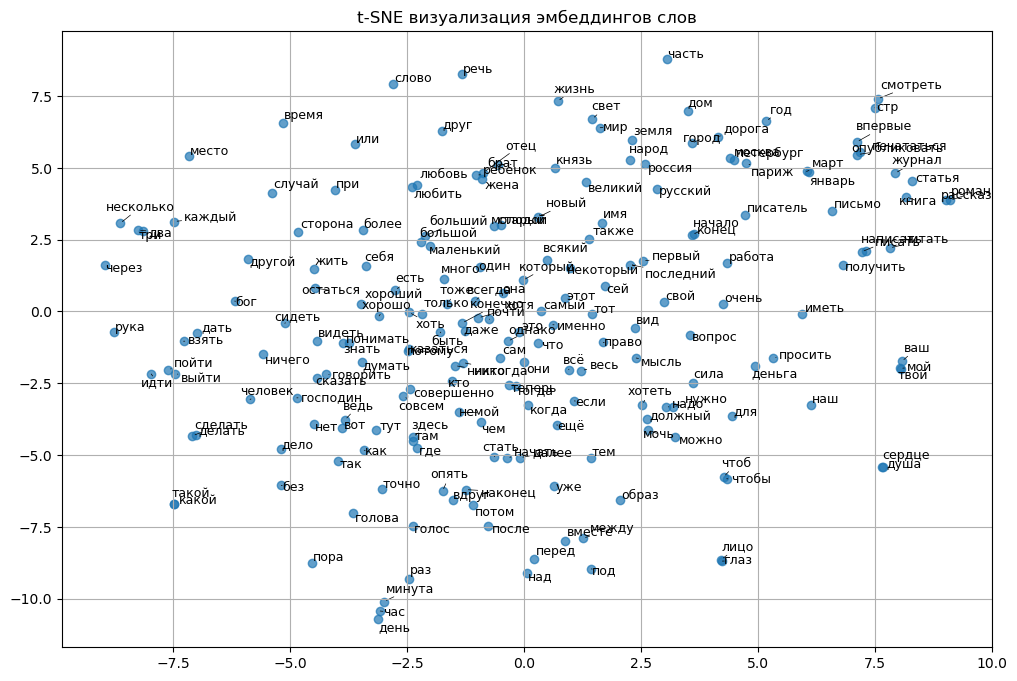

In [191]:
visualize_word_embeddings(w2v_model, num_words=200)

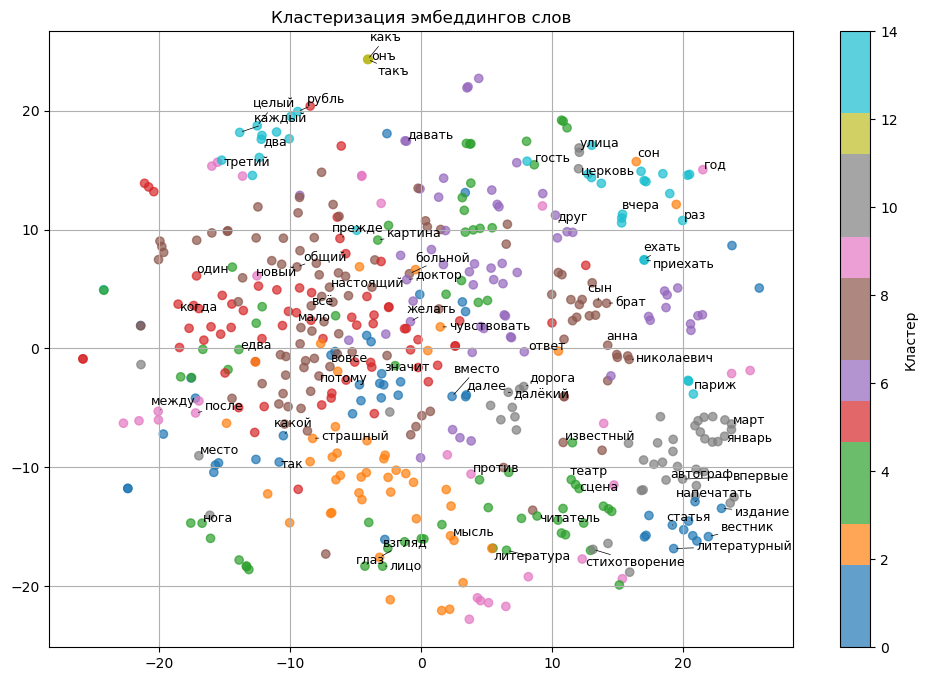

Топ слова по кластерам:
Кластер 0: как, так, дело, вот, нет, какой, без, иметь, где, чем, под, там, здесь, сделать, ведь, тут, потом, делать, совсем, наконец
Кластер 1: книга, статья, журнал, издание, литературный, газета, записка, напечатать, вестник, редакция, современник, книжка
Кластер 2: человек, время, слово, жизнь, тем, душа, мысль, более, сила, сердце, немой, народ, минута, вопрос, любовь, свет, мир, оно, чувство, чувствовать
Кластер 3: рука, глаз, идти, лицо, голова, вдруг, опять, выйти, молодой, сидеть, точно, голос, комната, увидеть, нога, стоять, ходить, стоить, глядеть, дверь
Кластер 4: писатель, рассказ, роман, образ, имя, речь, автор, отношение, поэт, литература, стих, язык, произведение, повесть, театр, мнение, характер, сцена, пьеса, герой
Кластер 5: что, она, это, они, тот, весь, всё, мочь, один, только, себя, ещё, сам, уже, когда, если, другой, теперь, наш, чтобы
Кластер 6: мой, говорить, сказать, знать, ваш, писать, друг, видеть, бог, написать, дать, твой, получить,

In [192]:
analyze_word_clusters(w2v_model, num_words=500, n_clusters=15)

In [193]:
check_word_similarities(w2v_model, words_to_check=["человек", "деньги", "время", "народ", "работа"])


Слова, наиболее близкие к 'человек':
  существо: 0.5856
  женщина: 0.5847
  народ: 0.5130
  труженик: 0.5074
  девушка: 0.5035
  поколение: 0.4968
  животное: 0.4913
  сублимация: 0.4912
  юноша: 0.4911
  аорта: 0.4864
Слово 'деньги' не найдено в словаре модели.

Слова, наиболее близкие к 'время':
  момент: 0.4730
  аммонит: 0.4513
  срок: 0.4339
  будущее: 0.4318
  эпоха: 0.4256
  прошедшее: 0.4218
  лето: 0.4190
  состояние: 0.3934
  минута: 0.3863
  бомбоносов: 0.3790

Слова, наиболее близкие к 'народ':
  нация: 0.6816
  европеец: 0.6809
  цивилизация: 0.6554
  славянин: 0.6426
  племя: 0.6371
  государство: 0.6359
  религия: 0.6304
  христианин: 0.6220
  человечество: 0.6132
  интеллигенция: 0.6090

Слова, наиболее близкие к 'работа':
  работать: 0.6875
  притрунивать: 0.5812
  наблюдение: 0.5656
  сооружить: 0.5490
  трудиться: 0.5401
  поработать: 0.5351
  мефистофелевский: 0.5264
  занятие: 0.5198
  труд: 0.5078
  глумиться: 0.5068


In [194]:
analogies = [
    ("мужчина", "женщина", "король", "королева"),
    ("франция", "париж", "россия", "петербург"),
    ("говорить", "сказать", "видеть", "взглянуть")
]
check_word_analogies(w2v_model, analogies)


Аналогия: мужчина : женщина = король : ?
Ожидаемый результат: королева
Полученные результаты:
  иоанн: 0.7556
  император: 0.7135
  принц: 0.6961
  димитрий: 0.6957
  митрополит: 0.6936
✗ 'королева' не найдено в топ-5 результатах

Аналогия: франция : париж = россия : ?
Ожидаемый результат: петербург
Полученные результаты:
  рим: 0.6898
  грасс: 0.6616
  берлин: 0.6546
  ницца: 0.6475
  баден: 0.6452
✗ 'петербург' не найдено в топ-5 результатах

Аналогия: говорить : сказать = видеть : ?
Ожидаемый результат: взглянуть
Полученные результаты:
  увидеть: 0.6169
  увидать: 0.5124
  взглянуть: 0.5081
  заметить: 0.4979
  узнать: 0.4843
✓ 'взглянуть' найдено в топ-5 результатах (позиция 3)


Теперь с использованием $\text{Skip Gram}$:

In [196]:
w2v_model_sg = Word2Vec(sentences=X_words_train, vector_size=300, window=5, sg=1, min_count=1, workers=4)

In [197]:
X_train_vect_w2v_sg = np.array([vectorize_text(text, w2v_model_sg) for text in X_words_train])
X_test_vect_w2v_sg = np.array([vectorize_text(text, w2v_model_sg) for text in X_words_test])

In [198]:
X_train_combined_w2v_sg = np.hstack([X_heur_train, X_train_vect_w2v_sg])
X_test_combined_w2v_sg = np.hstack([X_heur_test, X_test_vect_w2v_sg])

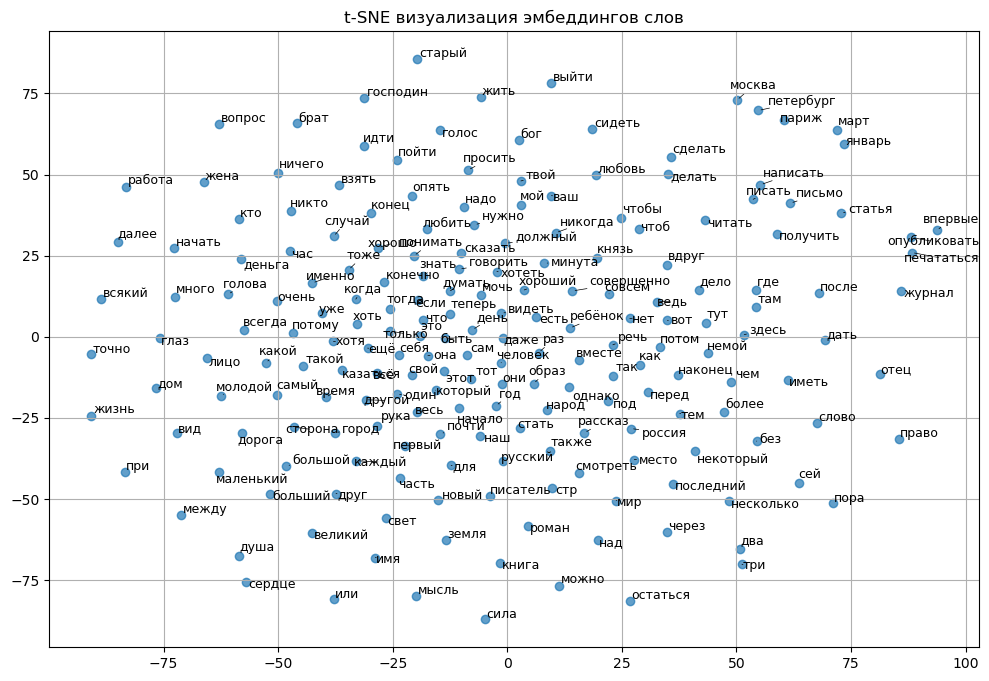

In [199]:
visualize_word_embeddings(w2v_model_sg, num_words=200)

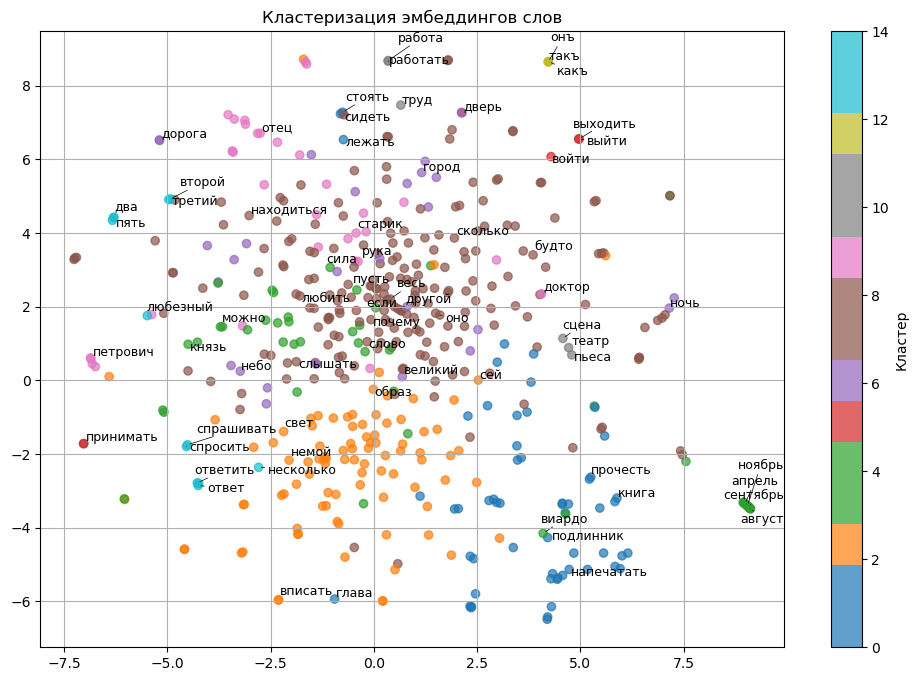

Топ слова по кластерам:
Кластер 0: сидеть, стоять, лежать
Кластер 1: письмо, смотреть, стр, русский, писать, написать, получить, книга, писатель, статья, рассказ, роман, читать, журнал, печататься, впервые, опубликовать, сочинение, издание, автор
Кластер 2: как, так, дело, вот, нет, без, иметь, после, где, чем, под, тем, там, здесь, место, сделать, ведь, последний, тут, более
Кластер 3: мочь, если, ваш, чтобы, хотеть, должный, дать, твой, можно, сила, взять, просить, надо, князь, нужно, чтоб, хоть, пойти, нельзя, желать
Кластер 4: париж, март, январь, май, февраль, декабрь, апрель, октябрь, ноябрь, июнь, август, июль, сентябрь, виардо, анненков
Кластер 5: выйти, дверь, выходить, войти, принимать
Кластер 6: идти, дом, вид, дорога, великий, земля, город, высокий, ночь, увидеть, прекрасный, улица, окно, близкий, поле, путь, гора, деревня, глубокий, небо
Кластер 7: быть, она, они, который, свой, весь, этот, мой, всё, один, только, для, ещё, год, уже, время, когда, другой, очень, теперь
Кла

In [200]:
analyze_word_clusters(w2v_model_sg, num_words=500, n_clusters=15)

In [201]:
check_word_similarities(w2v_model_sg, words_to_check=["человек", "деньги", "время", "народ", "работа"])


Слова, наиболее близкие к 'человек':
  труженик: 0.6984
  бессловесный: 0.6897
  амбиция: 0.6792
  покладистый: 0.6778
  лентяй: 0.6749
  непритворно: 0.6724
  шалопай: 0.6721
  семьянин: 0.6715
  начитанный: 0.6690
  себялюбие: 0.6689
Слово 'деньги' не найдено в словаре модели.

Слова, наиболее близкие к 'время':
  приуготовление: 0.5879
  фазис: 0.5778
  временно: 0.5773
  кратковременный: 0.5712
  переходный: 0.5704
  полиберальничать: 0.5697
  бездействовать: 0.5691
  участиться: 0.5689
  молодожён: 0.5667
  прошествие: 0.5663

Слова, наиболее близкие к 'народ':
  парод: 0.6100
  нация: 0.5963
  рыцарство: 0.5869
  серб: 0.5867
  мусульманин: 0.5865
  многомиллионный: 0.5854
  общечеловек: 0.5850
  чужеземец: 0.5841
  неисчислимый: 0.5835
  германец: 0.5815

Слова, наиболее близкие к 'работа':
  работать: 0.6279
  поработать: 0.5278
  завершение: 0.5186
  срочный: 0.5180
  кропотливый: 0.5177
  заработок: 0.5114
  страдный: 0.4961
  набираться: 0.4945
  заготовка: 0.4937
  подённы

In [202]:
analogies = [
    ("мужчина", "женщина", "король", "королева"),
    ("франция", "париж", "россия", "петербург"),
    ("говорить", "сказать", "видеть", "взглянуть")
]
check_word_analogies(w2v_model_sg, analogies)


Аналогия: мужчина : женщина = король : ?
Ожидаемый результат: королева
Полученные результаты:
  королева: 0.5985
  родриго: 0.5795
  лир: 0.5741
  инфант: 0.5640
  принц: 0.5558
✓ 'королева' найдено в топ-5 результатах (позиция 1)

Аналогия: франция : париж = россия : ?
Ожидаемый результат: петербург
Полученные результаты:
  гейдельберг: 0.5644
  апр: 0.5622
  фёвр: 0.5510
  петербург: 0.5509
  вашм: 0.5432
✓ 'петербург' найдено в топ-5 результатах (позиция 4)

Аналогия: говорить : сказать = видеть : ?
Ожидаемый результат: взглянуть
Полученные результаты:
  увидеть: 0.5611
  приметить: 0.5440
  связно: 0.5302
  желаться: 0.5293
  нерешимость: 0.5250
✗ 'взглянуть' не найдено в топ-5 результатах


#### GloVe

Для $\text{GloVe}$ будем использовать стандартные [предобученные эмбеддинги](http://vectors.nlpl.eu/repository/#) (Национальный корпус русского языка + русская Википедия, `vector_size=300, window=5`).

In [205]:
def load_glove_model(glove_path):
    glove_model = {}
    with open(glove_path, "r", encoding="utf-8") as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            vector = np.array(values[1:], dtype=np.float32)
            glove_model[word] = vector
    return glove_model

glove_path = "/content/model.txt"
glove_model = load_glove_model(glove_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/model.txt'

In [ ]:
# Функция для представления текста как среднего из векторов слов
def sentence_to_glove_embedding(sentence, glove_model, embedding_dim=100):
    vectors = [glove_model[word] for word in sentence if word in glove_model]
    if len(vectors) == 0:
        return np.zeros(embedding_dim)  # Если нет слов из текста, возвращаем нулевой вектор
    return np.mean(vectors, axis=0)

In [ ]:
X_train_vect_glove = np.array([sentence_to_glove_embedding(sentence, glove_model) for sentence in X_words_train])
X_test_vect_glove = np.array([sentence_to_glove_embedding(sentence, glove_model) for sentence in X_words_test])

In [ ]:
X_train_combined_glove = np.hstack([X_heur_train, X_train_vect_glove])
X_test_combined_glove = np.hstack([X_heur_test, X_test_vect_glove])

In [ ]:
visualize_word_embeddings(glove_model, num_words=200)

In [ ]:
analyze_word_clusters(glove_model, num_words=500, n_clusters=15)

In [ ]:
check_word_similarities(glove_model, words_to_check=["человек", "деньги", "время", "народ", "работа"])

In [ ]:
analogies = [
    ("мужчина", "женщина", "король", "королева"),
    ("франция", "париж", "россия", "петербург"),
    ("говорить", "сказать", "видеть", "взглянуть")
]
check_word_analogies(glove_model, analogies)

### FastText

In [229]:
!pip install gensim

DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.12/site-packages/scikit_uplift-0.5.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [230]:
from gensim.models import FastText

model_fasttext = FastText(sentences=X_words_train, vector_size=300, window=5, min_count=1, workers=4, epochs=10)

In [231]:
X_train_vect_fasttext = np.array([vectorize_text(text, model_fasttext) for text in X_words_train])
X_test_vect_fasttext = np.array([vectorize_text(text, model_fasttext) for text in X_words_test])

In [233]:
X_train_combined_fasttext = np.hstack([X_heur_train, X_train_vect_fasttext])
X_test_combined_fasttext = np.hstack([X_heur_test, X_test_vect_fasttext])

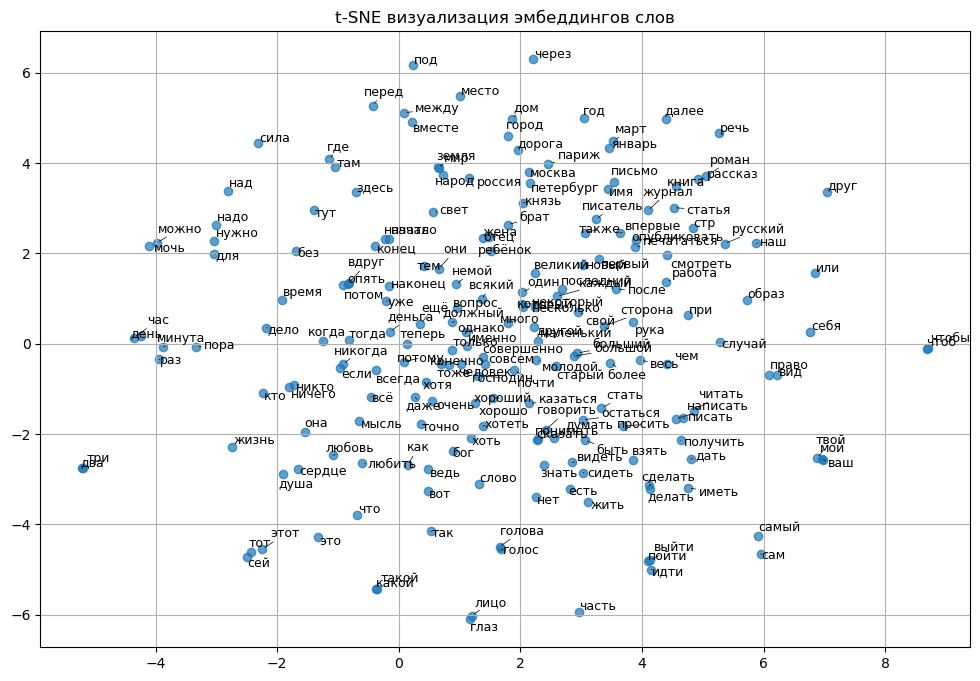

In [234]:
visualize_word_embeddings(model_fasttext, num_words=200)

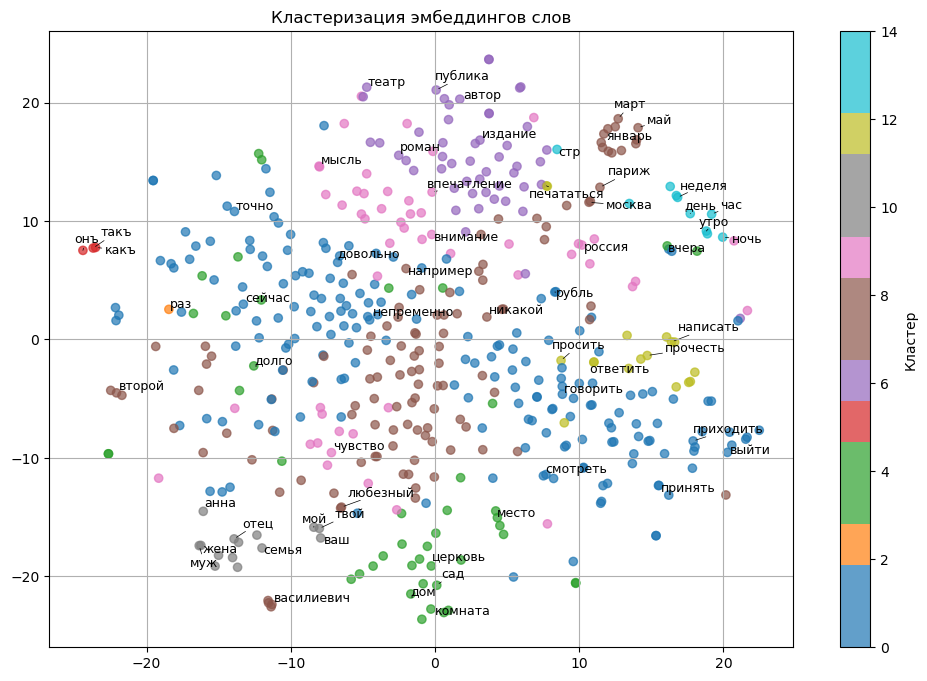

Топ слова по кластерам:
Кластер 0: быть, для, говорить, сказать, смотреть, знать, есть, нет, стать, видеть, без, иметь, идти, при, думать, казаться, дать, жить, сделать, любить
Кластер 1: что, она, это, как, они, так, всё, мочь, только, себя, человек, ещё, сам, уже, время, если, или, даже, очень, дело
Кластер 2: раз
Кластер 3: дом, сад
Кластер 4: когда, рука, два, где, там, место, голова, между, потом, вдруг, сторона, опять, через, дорога, три, пора, земля, вместе, город, комната
Кластер 5: какъ, онъ, такъ
Кластер 6: письмо, книга, писатель, статья, рассказ, роман, также, журнал, впервые, имя, часть, работа, опубликовать, сочинение, издание, автор, литературный, газета, поэт, литература
Кластер 7: москва, париж, март, январь, май, февраль, декабрь, апрель, октябрь, ноябрь, июнь, август, июль, сентябрь
Кластер 8: который, свой, тот, весь, этот, один, такой, другой, наш, русский, первый, какой, хороший, новый, самый, большой, после, под, всякий, последний
Кластер 9: слово, жизнь, глаз, л

In [235]:
analyze_word_clusters(model_fasttext, num_words=500, n_clusters=15)

In [236]:
check_word_similarities(model_fasttext, words_to_check=["человек", "деньги", "время", "народ", "работа"])


Слова, наиболее близкие к 'человек':
  человекаг: 0.9621
  человеко: 0.9446
  человеколюб: 0.9302
  человецех: 0.9286
  человец: 0.9242
  человекуиван: 0.9183
  всечеловек: 0.9118
  нечеловек: 0.9105
  человеци: 0.9066
  яеловек: 0.9056

Слова, наиболее близкие к 'деньги':
  деньг: 0.9991
  деньгамиг: 0.9466
  деньжищи: 0.9197
  деньп: 0.9107
  деньга: 0.8711
  деньжишки: 0.8695
  денеъ: 0.8613
  деныи: 0.8592
  денуайя: 0.8549
  деньжонки: 0.8533

Слова, наиболее близкие к 'время':
  времяй: 0.9820
  времяга: 0.9554
  вррремя: 0.9395
  времвш: 0.9259
  времячко: 0.9018
  навремя: 0.9010
  времонп: 0.8754
  вовремя: 0.8729
  врем: 0.8663
  фремя: 0.8200

Слова, наиболее близкие к 'народ':
  народец: 0.8983
  народище: 0.8942
  народик: 0.8594
  народна: 0.8420
  народолюбец: 0.8361
  народня: 0.8330
  иарод: 0.8320
  народишко: 0.8286
  народичок: 0.8136
  нарол: 0.7976

Слова, наиболее близкие к 'работа':
  работан: 0.9340
  работыца: 0.9270
  работища: 0.9093
  работяга: 0.9079
  че

In [237]:
analogies = [
    ("мужчина", "женщина", "король", "королева"),
    ("франция", "париж", "россия", "петербург"),
    ("говорить", "сказать", "видеть", "взглянуть")
]
check_word_analogies(model_fasttext, analogies)


Аналогия: мужчина : женщина = король : ?
Ожидаемый результат: королева
Полученные результаты:
  вашескороль: 0.7052
  королева: 0.6978
  королевна: 0.6772
  короленке: 0.6624
  королевин: 0.6591
✓ 'королева' найдено в топ-5 результатах (позиция 2)

Аналогия: франция : париж = россия : ?
Ожидаемый результат: петербург
Полученные результаты:
  ппариж: 0.7176
  дуэпариж: 0.7167
  парижпариж: 0.7022
  россияда: 0.6782
  риж: 0.6668
✗ 'петербург' не найдено в топ-5 результатах

Аналогия: говорить : сказать = видеть : ?
Ожидаемый результат: взглянуть
Полученные результаты:
  взвидеть: 0.7133
  увидеть: 0.7036
  повидеть: 0.6979
  невзвидеть: 0.6860
  свидеть: 0.6738
✗ 'взглянуть' не найдено в топ-5 результатах


Теперь с использованием $\text{Skip Gram}$:

In [239]:
model_fasttext_sg = FastText(sentences=X_words_train, vector_size=300, sg=1, window=5, min_count=1, workers=4, epochs=10)

In [240]:
X_train_vect_fasttext_sg = np.array([vectorize_text(text, model_fasttext_sg) for text in X_words_train])
X_test_vect_fasttext_sg = np.array([vectorize_text(text, model_fasttext_sg) for text in X_words_test])

In [241]:
X_train_combined_fasttext_sg = np.hstack([X_heur_train, X_train_vect_fasttext_sg])
X_test_combined_fasttext_sg = np.hstack([X_heur_test, X_test_vect_fasttext_sg])

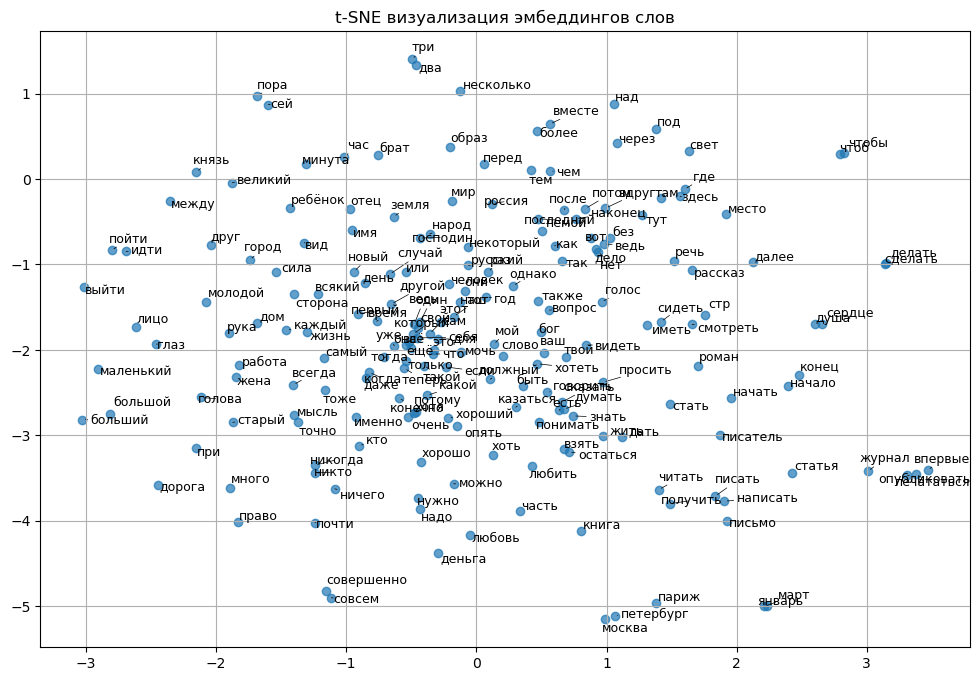

In [242]:
visualize_word_embeddings(model_fasttext_sg, num_words=200)

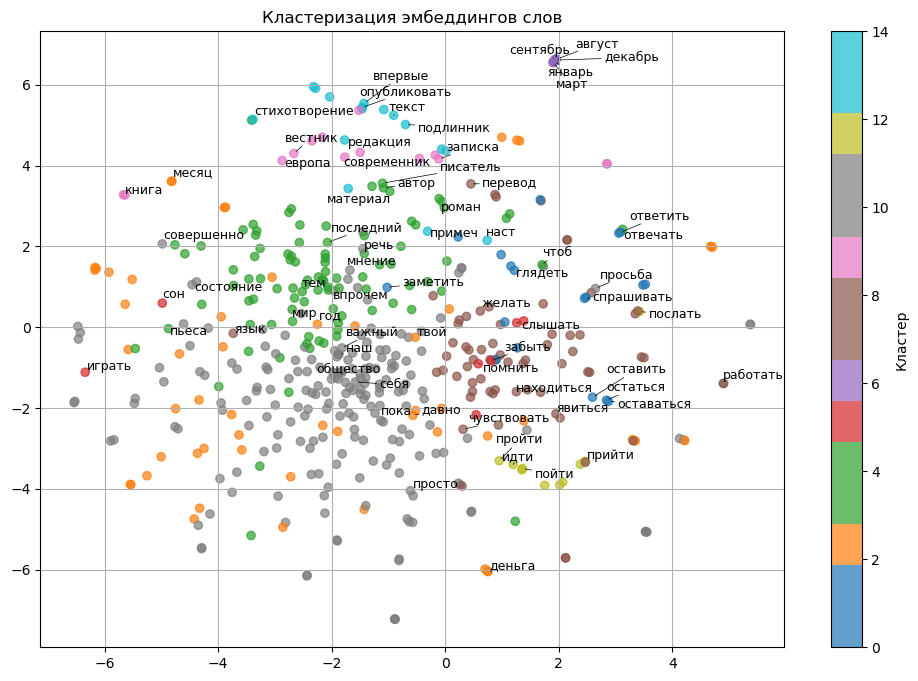

Топ слова по кластерам:
Кластер 0: остаться, оставаться, оставить
Кластер 1: смотреть, отвечать, приехать, узнать, увидеть, спросить, глядеть, заметить, ехать, ответить, подумать, спрашивать, прочесть, рассказывать, посмотреть
Кластер 2: год, день, два, раз, дом, твой, москва, петербург, опять, брат, деньга, через, дорога, три, князь, час, минута, париж, пора, город
Кластер 3: как, они, так, стр, дело, вот, нет, без, иметь, после, где, чем, под, тем, там, здесь, место, ведь, последний, тут
Кластер 4: писатель, рассказ, роман, речь, автор, произведение, повесть, пьеса, герой
Кластер 5: про, помнить, слышать, играть, забыть, слушать, сон
Кластер 6: март, январь, май, февраль, декабрь, апрель, октябрь, ноябрь, июнь, август, июль, сентябрь
Кластер 7: язык, перевод
Кластер 8: быть, говорить, сказать, знать, писать, есть, стать, видеть, хотеть, думать, казаться, написать, дать, жить, сделать, любить, получить, взять, делать, начать
Кластер 9: письмо, книга, статья, журнал, литературный, газе

In [243]:
analyze_word_clusters(model_fasttext_sg, num_words=500, n_clusters=15)

In [244]:
check_word_similarities(model_fasttext_sg, words_to_check=["человек", "деньги", "время", "народ", "работа"])


Слова, наиболее близкие к 'человек':
  богкчеловек: 0.8677
  человекаг: 0.8664
  безчеловек: 0.8143
  человеко: 0.8142
  сочеловек: 0.8079
  полчеловек: 0.7974
  человекобог: 0.7792
  человекапосле: 0.7779
  человекуиван: 0.7775
  сверхчеловек: 0.7591

Слова, наиболее близкие к 'деньги':
  деньг: 0.9745
  деньгамиг: 0.9244
  деньга: 0.9007
  деньп: 0.8921
  деньжищи: 0.8204
  деньжата: 0.8027
  денеишый: 0.7668
  деньжишки: 0.7662
  денегга: 0.7661
  деньжонки: 0.7645

Слова, наиболее близкие к 'время':
  времяй: 0.8854
  времяга: 0.7961
  времять: 0.7455
  времячко: 0.7001
  навремя: 0.6859
  врем: 0.6662
  времвш: 0.6626
  вррремя: 0.6321
  времонп: 0.5972
  канительювремя: 0.5855

Слова, наиболее близкие к 'народ':
  народик: 0.7529
  народец: 0.7450
  народище: 0.7415
  иарод: 0.7359
  народня: 0.7222
  народна: 0.7209
  народичок: 0.6905
  народить: 0.6875
  нарол: 0.6823
  народный: 0.6782

Слова, наиболее близкие к 'работа':
  работан: 0.8814
  работыца: 0.8276
  работища: 0.79

In [245]:
analogies = [
    ("мужчина", "женщина", "король", "королева"),
    ("франция", "париж", "россия", "петербург"),
    ("говорить", "сказать", "видеть", "взглянуть")
]
check_word_analogies(model_fasttext_sg, analogies)


Аналогия: мужчина : женщина = король : ?
Ожидаемый результат: королева
Полученные результаты:
  королева: 0.6565
  королевин: 0.6518
  королёв: 0.6371
  королёвин: 0.6320
  корольков: 0.6266
✓ 'королева' найдено в топ-5 результатах (позиция 1)

Аналогия: франция : париж = россия : ?
Ожидаемый результат: петербург
Полученные результаты:
  россияд: 0.6659
  парижпариж: 0.6658
  ппариж: 0.6589
  россияда: 0.6588
  вроссия: 0.6210
✗ 'петербург' не найдено в топ-5 результатах

Аналогия: говорить : сказать = видеть : ?
Ожидаемый результат: взглянуть
Полученные результаты:
  повидеть: 0.6347
  увидеть: 0.6340
  взвидеть: 0.5987
  зидеть: 0.5958
  невзвидеть: 0.5948
✗ 'взглянуть' не найдено в топ-5 результатах


### Сравнение пайплайнов на разных эмбеддингах

На этапе проведения экспериментов было выявлено, что лучшие метрики качества выдавала логистическая регрессия. Поэтому в пайплайне указываем `LogisticRegression`:

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [20]:
# Пайплайн Word2Vec
pipeline_w2v = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

pipeline_w2v.fit(X_train_combined_w2v, y_train)
y_pred_w2v = pipeline_w2v.predict(X_test_combined_w2v)

In [21]:
# Пайплайн Word2Vec + sg
pipeline_w2v_sg = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

pipeline_w2v_sg.fit(X_train_combined_w2v_sg, y_train)
y_pred_w2v_sg = pipeline_w2v_sg.predict(X_test_combined_w2v_sg)

In [30]:
# Пайплайн FastText
pipeline_fasttext = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

pipeline_fasttext.fit(X_train_combined_fasttext, y_train)
y_pred_fasttext = pipeline_fasttext.predict(X_test_combined_fasttext)

In [35]:
# Пайплайн FastText + sg
pipeline_fasttext_sg = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

pipeline_fasttext_sg.fit(X_train_combined_fasttext_sg, y_train)
y_pred_fasttext_sg = pipeline_fasttext_sg.predict(X_test_combined_fasttext_sg)

In [42]:
# Пайплайн GloVe
pipeline_glove = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

pipeline_glove.fit(X_train_combined_glove, y_train)
y_pred_glove = pipeline_glove.predict(X_test_combined_glove)

#### Замер метрик

In [22]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, classification_report, confusion_matrix

In [24]:
print("Метрики для Word2Vec:\n")

# Accuracy, ROC-AUC
accuracy = accuracy_score(y_test, y_pred_w2v)
roc_auc = roc_auc_score(y_test, pipeline_w2v.predict_proba(X_test_combined_w2v), multi_class='ovr')
print("Accuracy:", accuracy)
print("ROC-AUC:", roc_auc)
print()

# Precision, Recall, F1
precision = precision_score(y_test, y_pred_w2v, average='micro')
recall = recall_score(y_test, y_pred_w2v, average='micro')
f1 = f1_score(y_test, y_pred_w2v, average='micro')

print("Micro metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred_w2v)
print("Confusion Matrix:\n", conf_matrix)

Метрики для Word2Vec:

Accuracy: 0.8070175438596491
ROC-AUC: 0.9682197110784171

Micro metrics:
Precision: 0.8070175438596491
Recall: 0.8070175438596491
F1 Score: 0.8070175438596491
Confusion Matrix:
 [[14  2  1  1  0  0  3  0  0  0  1  0  0]
 [ 1 40  0  3  1  0  2  0  0  0  0  0  2]
 [ 0  1 31  1  0  0  0  2  0  2  1  1  1]
 [ 0  0  1 35  0  0  1  0  0  0  4  3  0]
 [ 0  1  1  0  8  0  0  0  0  1  0  0  1]
 [ 0  0  1  0  0 53  0  0  0  1  0  1  0]
 [ 0  1  3  2  0  1 56  0  0  1  0  0  2]
 [ 0  0  1  1  0  1  0  3  0  1  0  2  0]
 [ 0  0  0  0  0  0  1  0 51  0  0  0  1]
 [ 1  0  0  1  1  1  2  0  0 26  0  2  0]
 [ 1  1  1  2  0  0  0  0  0  0 29  3  0]
 [ 0  1  5  2  1  0  1  0  1  2  0 52  0]
 [ 1  0  1  5  0  0  2  0  0  0  0  1 16]]


In [25]:
print("Метрики для Word2Vec + Skip Gram:\n")

# Accuracy, ROC-AUC
accuracy = accuracy_score(y_test, y_pred_w2v_sg)
roc_auc = roc_auc_score(y_test, pipeline_w2v_sg.predict_proba(X_test_combined_w2v_sg), multi_class='ovr')
print("Accuracy:", accuracy)
print("ROC-AUC:", roc_auc)
print()

# Precision, Recall, F1
precision = precision_score(y_test, y_pred_w2v_sg, average='micro')
recall = recall_score(y_test, y_pred_w2v_sg, average='micro')
f1 = f1_score(y_test, y_pred_w2v_sg, average='micro')

print("Micro metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred_w2v_sg)
print("Confusion Matrix:\n", conf_matrix)

Метрики для Word2Vec + Skip Gram:

Accuracy: 0.8674463937621832
ROC-AUC: 0.9803196275721319

Micro metrics:
Precision: 0.8674463937621832
Recall: 0.8674463937621832
F1 Score: 0.8674463937621832
Confusion Matrix:
 [[16  1  0  0  1  0  2  0  0  1  0  1  0]
 [ 1 42  0  0  1  0  1  0  0  1  0  0  3]
 [ 0  0 36  1  0  0  0  0  0  1  1  0  1]
 [ 0  0  0 39  0  0  1  0  0  0  3  1  0]
 [ 0  0  0  1 10  0  0  0  0  1  0  0  0]
 [ 0  0  0  1  0 53  0  0  0  1  0  1  0]
 [ 0  1  0  0  0  0 63  0  0  1  0  0  1]
 [ 0  0  1  2  0  0  1  1  0  0  0  4  0]
 [ 0  0  0  0  0  0  1  0 51  0  0  0  1]
 [ 0  0  0  0  1  0  2  2  0 28  0  1  0]
 [ 0  1  0  1  0  0  0  0  0  0 34  1  0]
 [ 0  0  1  2  0  0  0  0  2  2  0 57  1]
 [ 1  2  0  3  0  0  2  1  0  2  0  0 15]]


In [31]:
print("Метрики для FastText:\n")

# Accuracy, ROC-AUC
accuracy = accuracy_score(y_test, y_pred_fasttext)
roc_auc = roc_auc_score(y_test, pipeline_fasttext.predict_proba(X_test_combined_fasttext), multi_class='ovr')
print("Accuracy:", accuracy)
print("ROC-AUC:", roc_auc)
print()

# Precision, Recall, F1
precision = precision_score(y_test, y_pred_fasttext, average='micro')
recall = recall_score(y_test, y_pred_fasttext, average='micro')
f1 = f1_score(y_test, y_pred_fasttext, average='micro')

print("Micro metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred_fasttext)
print("Confusion Matrix:\n", conf_matrix)

Метрики для FastText:

Accuracy: 0.8362573099415205
ROC-AUC: 0.9774748488976457

Micro metrics:
Precision: 0.8362573099415205
Recall: 0.8362573099415205
F1 Score: 0.8362573099415205
Confusion Matrix:
 [[16  1  1  1  1  0  1  1  0  0  0  0  0]
 [ 0 37  0  2  0  0  7  0  0  1  0  0  2]
 [ 0  1 32  1  0  0  0  0  0  4  1  0  1]
 [ 2  0  2 35  0  0  2  0  0  0  2  0  1]
 [ 1  0  1  0  8  0  0  0  0  1  0  0  1]
 [ 0  0  0  0  0 53  0  0  0  0  0  1  2]
 [ 0  2  1  0  0  0 62  0  0  1  0  0  0]
 [ 0  0  1  0  0  0  1  4  0  0  0  3  0]
 [ 0  1  0  0  0  0  3  0 49  0  0  0  0]
 [ 3  1  0  0  1  1  2  3  0 21  0  2  0]
 [ 0  1  0  0  0  0  0  0  0  0 36  0  0]
 [ 0  0  0  3  1  0  1  0  0  1  0 58  1]
 [ 1  0  1  2  0  0  2  1  0  1  0  0 18]]


In [36]:
print("Метрики для FastText + Skip Gram:\n")

# Accuracy, ROC-AUC
accuracy = accuracy_score(y_test, y_pred_fasttext_sg)
roc_auc = roc_auc_score(y_test, pipeline_fasttext_sg.predict_proba(X_test_combined_fasttext_sg), multi_class='ovr')
print("Accuracy:", accuracy)
print("ROC-AUC:", roc_auc)
print()

# Precision, Recall, F1
precision = precision_score(y_test, y_pred_fasttext_sg, average='micro')
recall = recall_score(y_test, y_pred_fasttext_sg, average='micro')
f1 = f1_score(y_test, y_pred_fasttext_sg, average='micro')

print("Micro metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred_fasttext_sg)
print("Confusion Matrix:\n", conf_matrix)

Метрики для FastText + Skip Gram:

Accuracy: 0.8947368421052632
ROC-AUC: 0.9839140873949538

Micro metrics:
Precision: 0.8947368421052632
Recall: 0.8947368421052632
F1 Score: 0.8947368421052632
Confusion Matrix:
 [[19  0  0  1  0  0  2  0  0  0  0  0  0]
 [ 1 43  0  2  0  0  0  0  0  0  0  0  3]
 [ 0  1 37  0  0  0  0  0  0  1  1  0  0]
 [ 1  1  1 39  0  0  0  0  0  0  0  1  1]
 [ 0  0  0  0 12  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 53  0  0  0  0  1  2  0]
 [ 0  1  0  0  0  0 63  0  0  1  0  0  1]
 [ 0  0  0  0  0  0  2  2  0  2  0  3  0]
 [ 1  0  0  0  0  0  0  0 51  0  0  1  0]
 [ 1  0  0  1  0  1  1  1  0 29  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0 35  1  0]
 [ 0  1  0  2  1  0  0  0  1  0  1 58  1]
 [ 1  1  0  2  0  0  3  0  0  0  1  0 18]]


In [43]:
print("Метрики для GloVe:\n")

# Accuracy, ROC-AUC
accuracy = accuracy_score(y_test, y_pred_glove)
roc_auc = roc_auc_score(y_test, pipeline_glove.predict_proba(X_test_combined_glove), multi_class='ovr')
print("Accuracy:", accuracy)
print("ROC-AUC:", roc_auc)
print()

# Precision, Recall, F1
precision = precision_score(y_test, y_pred_glove, average='micro')
recall = recall_score(y_test, y_pred_glove, average='micro')
f1 = f1_score(y_test, y_pred_glove, average='micro')

print("Micro metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred_glove)
print("Confusion Matrix:\n", conf_matrix)

Метрики для GloVe:

Accuracy: 0.2124756335282651
ROC-AUC: 0.6613072657129375

Micro metrics:
Precision: 0.2124756335282651
Recall: 0.2124756335282651
F1 Score: 0.2124756335282651
Confusion Matrix:
 [[ 0  3  0  0  0  6 10  0  1  0  0  2  0]
 [ 0 24  0  0  0  4 18  0  0  0  1  2  0]
 [ 0  6  0  1  1  4 15  0  3  0  7  3  0]
 [ 0  5  0  3  0 11 14  0  0  1  2  5  3]
 [ 0  7  0  0  1  0  3  0  0  1  0  0  0]
 [ 0  3  0  0  0  6 37  0  0  0  6  4  0]
 [ 0  2  0  0  0  6 53  0  1  0  1  3  0]
 [ 0  2  0  0  1  3  1  0  0  0  2  0  0]
 [ 0  2  0  2  1  4 37  0  1  0  2  4  0]
 [ 0  3  0  1  0  2 24  0  1  0  1  2  0]
 [ 0  1  0  3  0  8  8  0  0  0 15  2  0]
 [ 0  5  0  4  1 12 29  0  3  1  4  6  0]
 [ 0  5  0  2  2  2 11  0  0  0  2  2  0]]


По итогу на комбинированном наборе фичей (эвристики + текстовые) логистическая регрессия показала лучшие метрики для $\text{FastText + Skip Gram}$, однако время обучения модели оказалось достаточно большим.<br>
Оптимальным подходом по соотношению времени обучения и значений метрик можно назвать $\text{Word2Vec + Skip Gram}$.<br>
Предобученный $\text{GloVe}$ не подошел для нашей задачи предсказания авторства текстов из классической отечественной литературы.

Сохранение лучших моделей в `.pkl` файлы:

In [ ]:
!pip install joblib

In [ ]:
from joblib import dump, load

dump(model_w2v_sg, 'model_w2v_sg.pkl')
dump(pipeline_w2v_sg, 'pipeline_w2v_sg.pkl')